## Projeto: Sistema de Recomendação

## Recomendador

In [0]:
# visualizando diretório com a lista de arquivos .parquet disponíveis
dbutils.fs.ls('dbfs:/FileStore/tables/dados_spotify_tratados/')

Out[20]: [FileInfo(path='dbfs:/FileStore/tables/dados_spotify_tratados/data.parquet/', name='data.parquet/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/dados_spotify_tratados/data_artist.parquet/', name='data_artist.parquet/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/dados_spotify_tratados/data_genres.parquet/', name='data_genres.parquet/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/dados_spotify_tratados/data_w_genres.parquet/', name='data_w_genres.parquet/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/dados_spotify_tratados/data_year.parquet/', name='data_year.parquet/', size=0, modificationTime=0)]

In [0]:
# importação da biblioteca Pandas do Spark
import pyspark.pandas as ps

In [0]:
# leitura dos dados .parquet
path = 'dbfs:/FileStore/tables/dados_spotify_tratados/data.parquet'
df_data = ps.read_parquet(path)

In [0]:
# analisando informações dos dados carregados
df_data.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int32  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170080 non-null  float64
 5   duration_ms       170454 non-null  int64  
 6   energy            170573 non-null  float64
 7   explicit          170606 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170270 non-null  float64
 10  key               170451 non-null  int64  
 11  liveness          170613 non-null  float64
 12  loudness          170621 non-null  float64
 13  mode              170635 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        169496 non-null  int64  
 16  release_date     

In [0]:
# exluindo dados nulos
df_data = df_data.dropna()

In [0]:
# verificando status dataframe após eliminação dos dados nulos
df_data.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 169300 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           169300 non-null  float64
 1   year              169300 non-null  int32  
 2   acousticness      169300 non-null  float64
 3   artists           169300 non-null  object 
 4   danceability      169300 non-null  float64
 5   duration_ms       169300 non-null  int64  
 6   energy            169300 non-null  float64
 7   explicit          169300 non-null  int64  
 8   id                169300 non-null  object 
 9   instrumentalness  169300 non-null  float64
 10  key               169300 non-null  int64  
 11  liveness          169300 non-null  float64
 12  loudness          169300 non-null  float64
 13  mode              169300 non-null  int64  
 14  name              169300 non-null  object 
 15  popularity        169300 non-null  int64  
 16  release_date     

In [0]:
# criando nova coluna combinando nome da música com o nome do artista
df_data['artist_song'] = df_data.artists + ' - ' + df_data.name
df_data.head()

valence 
 year 
 acousticness 
 artists 
 danceability 
 duration_ms 
 energy 
 explicit 
 id 
 instrumentalness 
 key 
 liveness 
 loudness 
 mode 
 name 
 popularity 
 release_date 
 speechiness 
 tempo 
 artist_song 
 
 
 
 
 0 
 0.917 
 1970 
 0.096000 
 The Velvet Underground 
 0.624 
 201440 
 0.774 
 0 
 60ZyiL4lmWzZyGfqyECTqp 
 0.030900 
 7 
 0.0960 
 -10.391 
 1 
 Train Round the Bend - 2015 Remaster 
 24 
 1970 
 0.0315 
 117.006 
 The Velvet Underground - Train Round the Bend ... 
 
 
 1 
 0.511 
 1970 
 0.001900 
 Ten Years After 
 0.405 
 458463 
 0.543 
 0 
 6DYyyUdHzI6RdSx0swUR1i 
 0.720000 
 2 
 0.1860 
 -9.313 
 1 
 Love Like a Man - 2017 Remaster 
 34 
 1970-04-01 
 0.0290 
 107.598 
 Ten Years After - Love Like a Man - 2017 Remaster 
 
 
 2 
 0.466 
 1970 
 0.052800 
 The Mothers Of Invention 
 0.444 
 105587 
 0.568 
 0 
 6HJAS8XZO0ctUcN2KsbLRa 
 0.000010 
 11 
 0.5120 
 -8.800 
 0 
 Oh No 
 24 
 1970-08-10 
 0.0327 
 124.319 
 The Mothers Of Invention - Oh No 
 
 
 3 
 0.523 
 1970 
 0.081100 
 Three Dog Night 
 0.502 
 174707 
 0.669 
 0 
 7sZ74qmKb1nyGKUgHROJ1n 
 0.000945 
 7 
 0.0906 
 -11.725 
 1 
 One Man Band 
 19 
 1970-01-01 
 0.0912 
 121.089 
 Three Dog Night - One Man Band 
 
 
 4 
 0.501 
 1970 
 0.000128 
 The Rolling Stones 
 0.273 
 246413 
 0.866 
 0 
 095WtNlSHE8TMB2gQ1fdTx 
 0.790000 
 11 
 0.9610 
 -7.598 
 1 
 Street Fighting Man - Live 
 25 
 1970-09-04 
 0.0347 
 134.891 
 The Rolling Stones - Street Fighting Man - Live

In [0]:
# analisando quais colunas são do tipo string/objects
df_data.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 169300 entries, 0 to 170652
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           169300 non-null  float64
 1   year              169300 non-null  int32  
 2   acousticness      169300 non-null  float64
 3   artists           169300 non-null  object 
 4   danceability      169300 non-null  float64
 5   duration_ms       169300 non-null  int64  
 6   energy            169300 non-null  float64
 7   explicit          169300 non-null  int64  
 8   id                169300 non-null  object 
 9   instrumentalness  169300 non-null  float64
 10  key               169300 non-null  int64  
 11  liveness          169300 non-null  float64
 12  loudness          169300 non-null  float64
 13  mode              169300 non-null  int64  
 14  name              169300 non-null  object 
 15  popularity        169300 non-null  int64  
 16  release_date     

In [0]:
df_sem_objects = df_data.columns.to_list()
df_sem_objects.remove('artists')
df_sem_objects.remove('id')
df_sem_objects.remove('name')
df_sem_objects.remove('artist_song')
df_sem_objects.remove('release_date')
df_sem_objects

Out[29]: ['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

## Transformando o Dataframe

**Dataframe SQL do Spark**

In [0]:
# transformando dataframe pandas para SQL do spark
df_data = df_data.to_spark()

In [0]:
# consultando novo tipo de dado
type(df_data)

Out[31]: pyspark.sql.dataframe.DataFrame

**Vetorizando os dados**

In [0]:
# importação da ferramenta VectorAssembler
from pyspark.ml.feature import VectorAssembler

In [0]:
# novo dataframe com VectorAssembler para combinar múltiplas colunas em um único vetor composto de uma lista com apenas valores numéricos
dados_encoded_vector = VectorAssembler(inputCols=df_sem_objects, outputCol='features').transform(df_data)

In [0]:
# carregando as primeiras cinco linhas da coluna 'features' e impedindo que os valores sejam truncados
dados_encoded_vector.select('features').show(truncate=False, n=5)

+----------------------------------------------------------------------------------------------------------------------+
|features                                                                                                              |
+----------------------------------------------------------------------------------------------------------------------+
|[0.917,1970.0,0.096,0.624,201440.0,0.774,0.0,0.0309,7.0,0.096,-10.390999999999998,1.0,24.0,0.0315,117.006]            |
|[0.511,1970.0,0.0019,0.405,458463.0,0.5429999999999999,0.0,0.72,2.0,0.18600000000000005,-9.313,1.0,34.0,0.029,107.598]|
|[0.466,1970.0,0.0528,0.444,105587.0,0.568,0.0,1.02E-5,11.0,0.512,-8.8,0.0,24.0,0.0327,124.319]                        |
|[0.523,1970.0,0.0811,0.502,174707.0,0.669,0.0,9.45E-4,7.0,0.0906,-11.725,1.0,19.0,0.0912,121.089]                     |
|[0.501,1970.0,1.28E-4,0.273,246413.0,0.866,0.0,0.79,11.0,0.961,-7.598,1.0,25.0,0.0347,134.891]                        |
+-------------------------------

**Padronização dos dados por meio de uma operação de reescala**

In [0]:
# importação da ferramenta
from pyspark.ml.feature import StandardScaler

In [0]:
# realizando a padronização dos dados usando o método StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
model_scaler = scaler.fit(dados_encoded_vector)
dados_musicas_scaler = model_scaler.transform(dados_encoded_vector)

In [0]:
# visualizando resultado da transformação
dados_musicas_scaler.select('features_scaled').show(truncate=False, n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[3.493845627581973,76.01945247914719,0.25560097373899326,3.553867728626555,1.6031732036099804,2.8949505209817366,0.0,0.09859458986370954,1.9913197029800866,0.5493560155028588,-1.83

**Reduzindo número de *features***

In [0]:
# consultando qtde colunas
k = len(df_sem_objects)
k

Out[38]: 15

In [0]:
# importação da ferramenta PCA (Principal Component Analysis)
from pyspark.ml.feature import PCA

In [0]:
# aplicando a tranformação PCA aos dados e criando modelo com os parâmetros desejados
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca = model_pca.transform(dados_musicas_scaler)

In [0]:
# acessando o cálculo com a taxa de variância de cada componente explica sobre as variáveis originais
model_pca.explainedVariance

Out[41]: DenseVector([0.2656, 0.1207, 0.095, 0.0785, 0.0743, 0.0627, 0.0611, 0.0561, 0.05, 0.0418, 0.0342, 0.0227, 0.0203, 0.0089, 0.008])

In [0]:
# acessando a porcentagem total
sum(model_pca.explainedVariance) * 100

Out[42]: 100.00000000000003

**Objetivo: reduzir qtde de componentes para explicar ao menos 70% da variabilidade dos dados (ou *features*)**

In [0]:
# cálculo para visualizar o quanto da variabilidade total dos dados é explicada à medida que é adicionando mais componentes ao modelo
lista_valores = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k)]
lista_valores

Out[43]: [0.26559546201574613,
 0.38633995568156565,
 0.481313066659682,
 0.5598342425313095,
 0.6341616245863154,
 0.6968259227182991,
 0.7579363400230551,
 0.8140504754940465,
 0.8640376949888987,
 0.9058308612627605,
 0.9400513661542073,
 0.9627442126908647,
 0.9830935482319775,
 0.9919540017169323,
 1.0000000000000002]

In [0]:
import numpy as np

In [0]:
# cálculo para buscar qtde de registros que tenham ao menos 70% de explicação da variância
k = sum(np.array(lista_valores) <= 0.7)
k

Out[45]: 6

In [0]:
# aplicando a tranformação PCA aos dados e criando modelo com a qtde de componentes reduzidos
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca_final = model_pca.transform(dados_musicas_scaler)

In [0]:
# analisando resultado da transformação com o novo tamanho da lista de valores
dados_musicas_pca_final.select('pca_features').show(truncate=False, n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-32.31725372407879,-18.925010131278484,10.92771429220363,-14.569692108954701,-3.1817403495417502,4.244071962867768]  |
|[-31.132818221782877,-21.34230486564101,12.383759684804449,-13.755472800980986,-3.890295461577214,3.440922089757798]  |
|[-31.78064916266871,-19.569645663588258,12.541114621263855,-12.7857999611422,-1.5971144308353942,4.985715880825078]   |
|[-31.60584489317542,-19.547985862609632,11.833448205764727,-14.450217738392638,-3.5070019153785843,4.9497172630424515]|
|[-31.594059088957664,-20.741768225806418,12.379789932280927,-9.883622640679894,-2.659184406138894,4.54861497646521]   |
+-------------------------------

## Criação do *pipeline* com 3 etapas: Vetorização, Padronização e PCA

In [0]:
# importando a classe 'Pipeline',ferramenta do Spark MLlib para encadear vários estágios de processamento de dados em um único pipeline
from pyspark.ml import Pipeline

In [0]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=df_sem_objects, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='features_scaled'),
                                PCA(k=6, inputCol='features_scaled', outputCol='pca_features')])

In [0]:
# ajustando o modelo aos dados de entrada 'df_data' calculando os parâmetros necessários para o PCA
model_pca_pipeline = pca_pipeline.fit(df_data)

In [0]:
# aplicando a transformação do modelo PCA ao dataframe de entrada, gerando novo dataframe contendo os resultados da projeção
projection = model_pca_pipeline.transform(df_data)

In [0]:
# resultado do último passo do pipeline selecionando a coluna de saída
projection.select('pca_features').show(truncate=False, n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-32.31725372407879,-18.925010131278484,10.92771429220363,-14.569692108954701,-3.1817403495417502,4.244071962867768]  |
|[-31.132818221782877,-21.34230486564101,12.383759684804449,-13.755472800980986,-3.890295461577214,3.440922089757798]  |
|[-31.78064916266871,-19.569645663588258,12.541114621263855,-12.7857999611422,-1.5971144308353942,4.985715880825078]   |
|[-31.60584489317542,-19.547985862609632,11.833448205764727,-14.450217738392638,-3.5070019153785843,4.9497172630424515]|
|[-31.594059088957664,-20.741768225806418,12.379789932280927,-9.883622640679894,-2.659184406138894,4.54861497646521]   |
+-------------------------------

**Criação *clusters*.**

**Agrupando as diversas músicas de maneira que as músicas semelhantes fiquem próximas umas das outras**

In [0]:
# importação do módulo específico que traz a solução de *clustering*
from pyspark.ml.clustering import KMeans

In [0]:
# fixando uma SEED para garantir o mesmo resultado na execução deste notebook
SEED = 1224

In [0]:
# criação do cluster
kmeans = KMeans(k=50, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)

In [0]:
# aplicando processo de ajuste com K-Means ao modelo de dados
modelo_kmeans = kmeans.fit(projection)

In [0]:
# aplicando processo de transformação ao modelo de dados
projection_kmeans = modelo_kmeans.transform(projection)

In [0]:
# visualizando resultado
projection_kmeans.select(['pca_features','cluster_pca']).show()

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[-32.317253724078...|         31|
|[-31.132818221782...|         21|
|[-31.780649162668...|          9|
|[-31.605844893175...|         31|
|[-31.594059088957...|         43|
|[-31.938780024366...|         13|
|[-29.686935486197...|         47|
|[-31.539167346660...|         32|
|[-30.771547827750...|         17|
|[-29.965130076522...|         19|
|[-31.131053018497...|         31|
|[-31.266813769537...|         31|
|[-31.446803723293...|         31|
|[-29.943208559405...|          4|
|[-29.853371939403...|         14|
|[-31.758364291022...|         31|
|[-30.549983241698...|          2|
|[-29.347404415385...|         42|
|[-31.337850883791...|         31|
|[-32.659644073618...|         45|
+--------------------+-----------+
only showing top 20 rows



**Desvetorização - pegando uma coluna com seis valores e separá-la em dois valores**

In [0]:
# importação do módulo responsável de transformar vetor em lista
from pyspark.ml.functions import vector_to_array

In [0]:
# adicionando duas novas colunas ao dataframe para permitir visualizar os dados projetos no espaço de componentes principais em um gráfico
projection_kmeans = projection_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                                   .withColumn('y', vector_to_array('pca_features')[1])

In [0]:
# carregando lista de colunas para analisar quais dados ideais para carregar na visualização gráfica
projection_kmeans.select(['x', 'y', 'cluster_pca', 'artist_song']).show()

+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|         artist_song|
+-------------------+-------------------+-----------+--------------------+
| -32.31725372407879|-18.925010131278484|         31|The Velvet Underg...|
|-31.132818221782877| -21.34230486564101|         21|Ten Years After -...|
| -31.78064916266871|-19.569645663588258|          9|The Mothers Of In...|
| -31.60584489317542|-19.547985862609632|         31|Three Dog Night -...|
|-31.594059088957664|-20.741768225806418|         43|The Rolling Stone...|
|-31.938780024366565| -18.64127655559876|         13|Sly & The Family ...|
|-29.686935486197306| -21.43318756800143|         47|William S. Fische...|
|-31.539167346660424|-20.172532235961633|         32|Yusuf / Cat Steve...|
|-30.771547827750314|-19.778300972177536|         17|The Meters - Oh, ...|
|-29.965130076522186| -20.25008778917281|         19|Linda Ronstadt - ...|
|-31.131053018497823| -19

In [0]:
# importando ferramenta que permite uma visualização complexa de forma fácil
import plotly.express as px

In [0]:
# criando gráfico de dispersão bidimensional usando biblioteca Plotly
fig = px.scatter(projection_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artist_song'])
fig.show()

**Desenvolvendo nova etapa do recomendador**

**receber uma música de entrada e retornar a recomendação de uma playlist de músicas semelhantes do cantor de interesse**

In [0]:
# definindo uma variável com nome do artista e da música de interesse
nome_musica = 'Taylor Swift - Blank Space'

In [0]:
# pesquisando em qual cluster a música de interesse está armazenada
cluster = projection_kmeans.filter(projection_kmeans.artist_song == nome_musica).select('cluster_pca').collect()
cluster

Out[65]: [Row(cluster_pca=1), Row(cluster_pca=1), Row(cluster_pca=1)]

In [0]:
# acessando a lista e o nome do cluster com a posição que ele pertence
cluster = projection_kmeans.filter(projection_kmeans.artist_song == nome_musica).select('cluster_pca').collect()[0][0]
cluster

Out[66]: 1

In [0]:
# após localização da música e do cluster, seguindo o desenvolvimento da recomendação de outras músicas que estejam no mesmo cluster = 1
musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                       .select('artist_song', 'id', 'pca_features')
musicas_recomendadas.show()

+--------------------+--------------------+--------------------+
|         artist_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Joe Jackson - Friday|4u5lpvG50zI3af2ih...|[-32.822867541142...|
|Fehlfarben - Ein ...|6mMUoEgOl1yuGMJ6d...|[-33.650087498230...|
|Barão Vermelho - ...|44BxEH341a9zeJq2z...|[-33.168497393731...|
|John Mellencamp -...|5lGbZ3NO0ZTuJU3bY...|[-33.214695809765...|
|The Fixx - Deeper...|3zgNLhqjoZmwEBZZd...|[-32.648052300139...|
|Triumph - Spellbound|7AizGwaIVIR6pi4IN...|[-32.755479391083...|
|Chicago - We Can ...|0scNiAT9bGMnMxk8V...|[-32.742844539858...|
|Hoodoo Gurus - My...|6CWlnWgVBJekeFbx9...|[-33.239896854932...|
| Bon Jovi - Breakout|0nv34PfYOvpRFAppC...|[-33.059092174289...|
|Simple Minds - On...|1rHeMiQxEOtyeibXe...|[-32.928386253646...|
|Soda Stereo - Dan...|6WB3ovHYXvhXfXQnA...|[-33.473356727911...|
|Raul Porchetto - ...|2q4WF7KqM5yvVoQNC...|[-33.561870843095...|
|Bob Seger - It's You|46X

In [0]:
# buscando valores (componentes) que representam a música de interesse armazenando os princiapais componentes da música de entrada
componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artist_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]
componenetes_musica

Out[68]: DenseVector([-33.6727, -20.0522, 12.1135, -15.6564, -3.8549, 3.5919])

**Cálculo da distância entre a pca_features das outras músicas do cluster** 

In [0]:
# utilizando a distância euclidiana para calcular a distância entre a pca_features das outras músicas do cluster
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType
import pyspark.sql.functions as f

In [0]:
# função com único papel de chamar a função euclidean
def calcula_distance(value):
    return euclidean(componenetes_musica, value)

# transformando a função compatível para o Spark, retornando valores do tipo float
udf_calcula_distance = f.udf(calcula_distance, FloatType())

# dataframe para representar distâncias, incluindo coluna para representar essa distância com os valores que a função udf calcular
musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

In [0]:
# novo dataframe com base na classificação das músicas recomendadas com 10 primeiros registros e com as colunas de interesse
recomendadas = spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artist_song', 'id', 'Dist'])

recomendadas.show()

+--------------------+--------------------+--------------------+
|         artist_song|                  id|                Dist|
+--------------------+--------------------+--------------------+
|Taylor Swift - Bl...|1kHEuJRasudLhjvnb...|                 0.0|
|Taylor Swift - Bl...|2sC2P3BN0IXujNaaS...|0.025183653458952904|
|Jon Bellion - Mor...|2JXNOtb0ANe6MzgRY...| 0.24700608849525452|
|Taylor Swift - Bl...|1p80LdxRV74UKvL8g...| 0.26054543256759644|
|Meghan Trainor - ...|0Jrzzjj0pVzS6xl4w...| 0.26199471950531006|
|AJR; Rivers Cuomo...|5jiYx70OBzEI99jx1...| 0.39728784561157227|
|Kelsea Ballerini ...|6FWrlXo99QRmPtOeU...| 0.41006532311439514|
|Dylan Scott - Eas...|3sfJXqWV7sr2aQiSa...| 0.41550618410110474|
|Dan + Shay - Take...|72HP2M4jjw4t0AIGd...|  0.4155575633049011|
|Ozuna; Manuel Tur...|48zFZh27QU5qsrBjn...|  0.4289771318435669|
+--------------------+--------------------+--------------------+



##Refatorando código recomendador para uma única função

In [0]:
def recomendador(nome_musica):
    cluster = projection_kmeans.filter(projection_kmeans.artist_song == nome_musica).select('cluster_pca').collect()[0][0]
    musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                       .select('artist_song', 'id', 'pca_features')
    componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artist_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

    def calcula_distance(value):
        return euclidean(componenetes_musica, value)

    udf_calcula_distance = f.udf(calcula_distance, FloatType())

    musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

    recomendadas = spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artist_song', 'id', 'Dist'])

    return recomendadas

In [0]:
# executando nova função e visualizando dataframe
df_recomedada = recomendador('Taylor Swift - Blank Space')
df_recomedada.show()

+--------------------+--------------------+--------------------+
|         artist_song|                  id|                Dist|
+--------------------+--------------------+--------------------+
|Taylor Swift - Bl...|1kHEuJRasudLhjvnb...|                 0.0|
|Taylor Swift - Bl...|2sC2P3BN0IXujNaaS...|0.025183653458952904|
|Jon Bellion - Mor...|2JXNOtb0ANe6MzgRY...| 0.24700608849525452|
|Taylor Swift - Bl...|1p80LdxRV74UKvL8g...| 0.26054543256759644|
|Meghan Trainor - ...|0Jrzzjj0pVzS6xl4w...| 0.26199471950531006|
|AJR; Rivers Cuomo...|5jiYx70OBzEI99jx1...| 0.39728784561157227|
|Kelsea Ballerini ...|6FWrlXo99QRmPtOeU...| 0.41006532311439514|
|Dylan Scott - Eas...|3sfJXqWV7sr2aQiSa...| 0.41550618410110474|
|Dan + Shay - Take...|72HP2M4jjw4t0AIGd...|  0.4155575633049011|
|Ozuna; Manuel Tur...|48zFZh27QU5qsrBjn...|  0.4289771318435669|
+--------------------+--------------------+--------------------+



##Instalação da biblioteca que faz conexão entre o notebook e a API do Spotify

In [0]:
!pip install spotipy

     |████████████████████████████████| 250 kB 5.6 MB/s 
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-c06187f4-beed-4688-8b16-944c6fdb7a63/bin/python -m pip install --upgrade pip' command.


In [0]:
# importação das bibliotecas para fazer conexão e autenticação
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

In [0]:
# criando autenticação Spotify
scope = "user-library-read playlist-modify-private"

OAuth = SpotifyOAuth(
        scope=scope,         
        redirect_uri='http://localhost:5000/callback',
        client_id = '566b010ba65541ebb537ea12f225fee3',
        client_secret = '0d71d1191ca7418d9af15433c6acfd62')

In [0]:
# criação das credenciais
client_credentials_manager = SpotifyClientCredentials(client_id = '306d3c004dd64946963cd843f51fe776',
                                                      client_secret = '99a7224134374917b71d0d8e10d1962b')

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [0]:
# extração de dados - pegando código que identifica a música de maneira única
id = projection_kmeans.filter(projection_kmeans.artist_song == nome_musica).select('id').collect()[0][0]
id

Out[77]: '1kHEuJRasudLhjvnbfc4yS'

In [0]:
# resgatando informações da música
sp.track(id)

Out[78]: {'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'SE',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'GB',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',

##Extraindo informações das músicas recomendadas

**1. nome da música, da forma como está publicado no Spotify**

**2. capa do álbum, que usaremos para diferenciar as duas músicas da Taylor Swift exibidas na recomendação**

In [0]:
# obtendo uma coluna com a lista de IDs
playlist_id = df_recomedada.select('id').collect()
playlist_id

Out[79]: [Row(id='1kHEuJRasudLhjvnbfc4yS'),
 Row(id='2sC2P3BN0IXujNaaSyDmtP'),
 Row(id='2JXNOtb0ANe6MzgRYDQG2J'),
 Row(id='1p80LdxRV74UKvL8gnD7ky'),
 Row(id='0Jrzzjj0pVzS6xl4wonUNh'),
 Row(id='5jiYx70OBzEI99jx1Gn3FN'),
 Row(id='6FWrlXo99QRmPtOeUSWDjv'),
 Row(id='3sfJXqWV7sr2aQiSaahbZc'),
 Row(id='72HP2M4jjw4t0AIGdEVGEF'),
 Row(id='48zFZh27QU5qsrBjn4C2FA')]

In [0]:
# criando um laço de repetição para passar por todos os IDs e extrair informações da API do Spotify
playlist_track = []
for id in playlist_id:
    playlist_track.append(sp.track(id[0]))

## Atualização da função recomendador
**Objetivo:** Utilizar API do Spotify para trazer outras informações mais importantes sobre as músicas

In [0]:
def recomendador(nome_musica):
    # calcula músicas recomendadas
    cluster = projection_kmeans.filter(projection_kmeans.artist_song == nome_musica).select('cluster_pca').collect()[0][0]
    musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                       .select('artist_song', 'id', 'pca_features')
    componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artist_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

    def calcula_distance(value):
        return euclidean(componenetes_musica, value)

    udf_calcula_distance = f.udf(calcula_distance, FloatType())

    musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

    recomendadas = spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artist_song', 'id', 'Dist'])

    #id = projection_kmeans.filter(projection_kmeans.artist_song == nome_musica).select('id').collect()[0][0]

    # pegando informações da API
    playlist_id = df_recomedada.select('id').collect()

    playlist_track = []
    for id in playlist_id:
        playlist_track.append(sp.track(id[0]))

    return len(playlist_track)

In [0]:
# executando nova função que realiza todos os filtros e com nova etapa de conexão com API do Spotify para pegar mais dados das músicas
recomendador('Taylor Swift - Blank Space')

Out[82]: 10

**Conforme esperado, foi retornado o valor 10 no output, indicando que foi possível acessar a API do Spotify e obter informações sobre as 10 músicas que queremos recomendar.**

##Carregar imagens das músicas recomendadas

In [0]:
# instalação biblioteca que permite visualizar e criar imagens no Jupyter Notebook
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.5/38.5 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.1/224.1 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Not uninstalling numpy at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-c06187f4-beed-4688-8b16-944c6fdb7a63
    Can't uninstall 'numpy'. No files were found to uninstall.
  Attempting uninstall: scipy
    Found existi

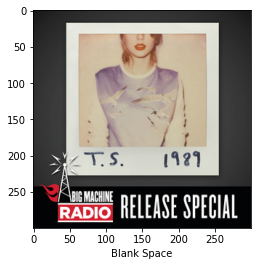

In [0]:
# importação das bibliotecas 
import matplotlib.pyplot as plt
from skimage import io

# definição da variável com a música de interesse
nome_musica = 'Taylor Swift - Blank Space'

# extração do id da música
id = projection_kmeans.filter(projection_kmeans.artist_song == nome_musica).select('id').collect()[0][0]

# acionando a biblioteca do Spotify para recuperar informações específicas de uma faixa de música em formato JSON
track = sp.track(id)

# extraindo duas informações da API do Spotify 
url = track["album"]["images"][1]["url"]
name = track["name"]

# exibindo imagem utilizando biblioteca matplotlib com a função imshow()
image = io.imread(url)
plt.imshow(image)

# passando o título para o gráfico
plt.xlabel(name, fontsize = 10)
plt.show()

In [0]:
# função visualize_song() para plotar e melhorar visualização carregando todas as músicas recomendadas
import matplotlib.pyplot as plt
from skimage import io

def visualize_songs(name,url):

    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        ax.set_xticks([])  # Oculta os xticks
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
    plt.show()

In [0]:
# criação das listas com os nomes e as URLs das músicas
playlist_id = df_recomedada.select('id').collect()

name = []
url = []
for i in playlist_id:
    track = sp.track(i[0])
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])

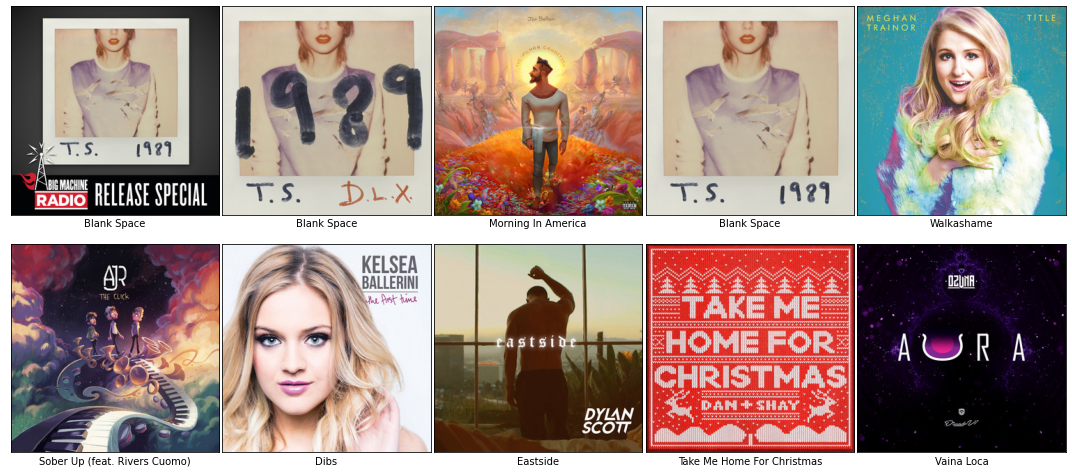

In [0]:
# executando a função 
visualize_songs(name,url)

**Refatoração final da função**

In [0]:
def recomendador(nome_musica):
    # calcula músicas recomendadas
    cluster = projection_kmeans.filter(projection_kmeans.artist_song == nome_musica).select('cluster_pca').collect()[0][0]
    musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                       .select('artist_song', 'id', 'pca_features')
    componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artist_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

    def calcula_distance(value):
            return euclidean(componenetes_musica, value)

    udf_calcula_distance = f.udf(calcula_distance, FloatType())

    musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

    recomendadas = spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artist_song', 'id', 'Dist'])

    # pegando informações da API
    playlist_id = recomendadas.select('id').collect()

    name = []
    url = []
    for i in playlist_id:
        track = sp.track(i[0])
        url.append(track["album"]["images"][1]["url"])
        name.append(track["name"])
    
    # plotando as capas
    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        ax.set_xticks([])  # Oculta os xticks
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
    plt.show()

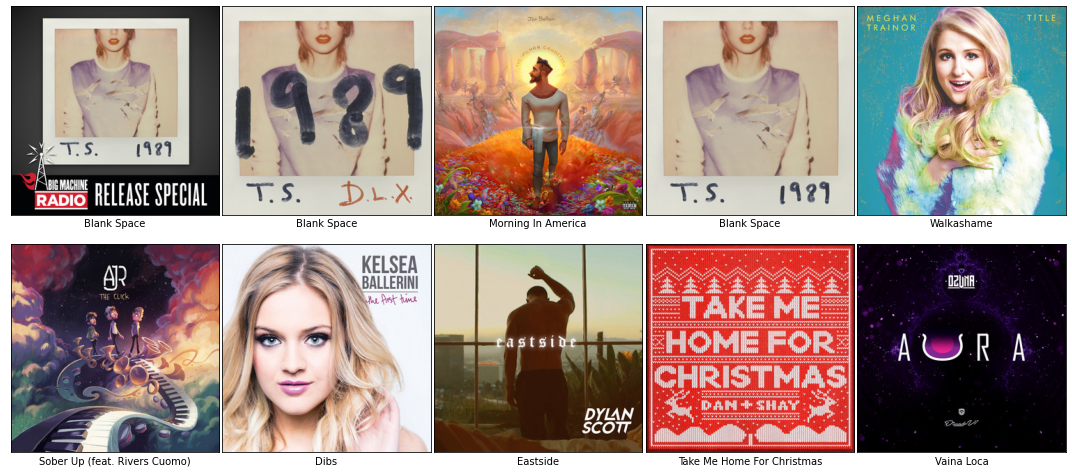

In [0]:
# executando função final
recomendador('Taylor Swift - Blank Space')

##Final
**Recomendador executa todas as etapas:**
  * Buscar músicas do mesmo cluster;
  * Calcular a distância entre elas;
  * Ordená-las pela distância;
  * Trazer o resultado em um formato diferente, acionando a API do Spotify para perguntar qual é a capa do álbum e qual é o nome da música;
  * E plotar o resultado.